In [1]:
import re
import cv2
#import pytesseract
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import model_from_json
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from PIL import Image

import warnings
warnings.filterwarnings(action='ignore')

#pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:

json_file = open("/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/MobileNets_character_recognition.json", "r") 
loaded_model = json_file.read() 
json_file.close() 

model = model_from_json(loaded_model)

model.load_weights("/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/License_character_recognition_weight.h5")

In [3]:
char=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']  
alphabets=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
numbers=['0','1','2','3','4','5','6','7','8','9']
def x_cord_contour(contour):
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00']))


def text_detection(path, AREA=10, W=10, H=10):
    image_name=path.split('/')[7]
    image_name=image_name[:len(image_name)-4]
    X=[]
    
    '''path: 원본 이미지 경로
       AREA: 감지된 영역의 넓이 최솟값
       W: 감지된 영역의 폭 최솟값
       H: 감지된 영역의 높이 최솟값'''
    
    # preprocessing
    image = cv2.imread(path)
    try:
      plt.imshow(image)
    except 
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # 흑백
    blurred = cv2.GaussianBlur(gray, (5, 5), 0) # 블러
    edged = cv2.Canny(blurred, 30, 150) # 가장자리 감지
    
    # detection
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [c for c in contours if cv2.contourArea(c) >= AREA]
    contours = sorted(filtered_contours, key=x_cord_contour, reverse = False)

    img = Image.open(path)
    crop_imgs = []

    for i in range(len(contours)):
        (x, y, w, h) = cv2.boundingRect(contours[i])

        if w >= W and h >= H:
            area = (x, y, x+w, y+h)
            image=img.crop(area).resize((64, 64))
            crop_imgs.append(image)
            image.save(image_name +'_'+ str(i)+'.png','PNG')
            np_image=load_img(image_name +'_'+ str(i)+".png",target_size=(80,80))
            np_image=img_to_array(np_image)
            X.append(np_image)
    X = np.array(X,dtype="float16")
    for i in range(model.predict(X).shape[0]):
      character=char[np.argmax(model.predict(X)[i])]
      save_dir= "/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/character_segmentation/"
      crop_imgs[i].save(save_dir + image_name +'_'+ character +'.png','PNG')




    # show




In [4]:
import os
path_dir = "/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/fonts"
file_list = os.listdir(path_dir)
file_list.sort()

In [40]:
len(file_list)

1254

In [25]:
temppath= "/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/fonts/"+file_list[126]
temp = cv2.imread(temppath)
type(temp)
#tempgray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)


temp?

In [41]:
#126, 143, 163. 312, 334, 337, 349
error_filename=[]
cnt=0
for filename in file_list:
    if cnt>200 and cnt<300:
      print(cnt)
      path = "/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/fonts/" + filename

      try:
        text_detection(path)

      except AttributeError:
        error_filename.append(filename)
        file_list.remove(filename)
        pass
      except KeyError:
        error_filename.append(filename)
        file_list.remove(filename)
        pass
      except:
        error_filename.append(filename)
        file_list.remove(filename)
        pass

    cnt+=1


201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299


In [11]:
print(error_filename)

['disgust typography_18.jpg']


In [12]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)




In [13]:
import sys
import os
from os import listdir

test=os.listdir("/content")

for item in test:
    if item.endswith(".png"):
        os.remove(item)

In [32]:
def imageMerge_save(img_list, segmentation_names):
  new_image=Image.new("RGB", (64*26, 64), (256,256,256))
  for index in range(len(img_list)):
    char=segmentation_names[index][-5]
    char_locate=alphabets.index(char)
    area=((char_locate*64), 0, (64*(char_locate+1)), 64)
    new_image.paste(img_list[index], area)
  save_dir= "/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/mcgan_input/" + segmentation_names[0][ : len(segmentation_names[0])-6]
  createFolder(save_dir + "/A")
  createFolder(save_dir + "/A/train")
  createFolder(save_dir + "/A/test")
  createFolder(save_dir + "/B")
  createFolder(save_dir + "/B/train")
  createFolder(save_dir + "/B/test")
  new_image.save(save_dir + "/A/test/"+ segmentation_names[0][ : len(segmentation_names[0])-6] + ".png", 'PNG')
  #image.save(image_name +'_'+ str(i)+'.png','PNG')
  plt.imshow(new_image)

def imageMerge_except1_save(img_list, segmentation_names):

  for ban_idx in range(len(img_list)):
    new_image=Image.new("RGB", (64*26, 64), (256,256,256))
    for index in range(len(img_list)):
      if (index!=ban_idx):
        char=segmentation_names[index][-5]
        char_locate=alphabets.index(char)
        area=((char_locate*64), 0, (64*(char_locate+1)), 64)
        new_image.paste(img_list[index], area)
      save_dir= "/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/mcgan_input/" + segmentation_names[0][ : len(segmentation_names[0])-6]
      createFolder(save_dir + "/A")
      createFolder(save_dir + "/A/train")
      createFolder(save_dir + "/A/test")
      createFolder(save_dir + "/B")
      createFolder(save_dir + "/B/train")
      createFolder(save_dir + "/B/test")
      new_image.save(save_dir + "/A/train/"+ segmentation_names[0][ : len(segmentation_names[0])-6] +  "_" +  str(alphabets.index(segmentation_names[ban_idx][-5])) + ".png", 'PNG')

def image_each_save(img_list, segmentation_names):
  for image_num in range(len(img_list)):
    char=segmentation_names[image_num][-5]
    char_locate=alphabets.index(char)
    save_dir= "/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/mcgan_input/" + segmentation_names[0][ : len(segmentation_names[0])-6]
    createFolder(save_dir + "/A")
    createFolder(save_dir + "/A/train")
    createFolder(save_dir + "/A/test")
    createFolder(save_dir + "/B")
    createFolder(save_dir + "/B/train")
    createFolder(save_dir + "/B/test")
    img_list[image_num].save(save_dir + "/B/train/" + segmentation_names[0][ : len(segmentation_names[0])-6] +  "_" +  str(alphabets.index(segmentation_names[image_num][-5])) + ".png", 'PNG')



152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


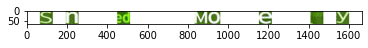

In [38]:


import glob
segmentation_list = os.listdir("/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/character_segmentation/")


cnt=0
for total_font_image in file_list:
  if cnt<200 and cnt>151:
    print(cnt)
    segmentation_names=[f for f in segmentation_list if (f[-5] not in numbers) and ((total_font_image[:len(total_font_image)-4] + "_") in f)]
    img_list=[]
    for f in segmentation_names:
      image=Image.open("/content/gdrive/MyDrive/Colab Notebooks/Character Segmentation3/character_segmentation/" + f)
      img_list.append(image)

    imageMerge_save(img_list, segmentation_names)
    imageMerge_except1_save(img_list, segmentation_names)
    image_each_save(img_list, segmentation_names)
  cnt+=1

In [ ]:
for i in range(5):
  print(segmentation_list[i])
for i in range(5):
  print(file_list[i])
